In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
bostData = pd.DataFrame(boston.data, columns=boston.feature_names)
bostData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Adding the target variable to the dataframe

bostData["MEDV"] = boston.target
bostData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
bostData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### **EDA using pandas profiling report**

In [ ]:
#!pip install pandas_profiling==2.8.0

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 3.1MB 5.3MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 604kB 22.3MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 296kB 17.1MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=d8b46f847a027fbe9d4a9d98565b598db8d44b0faf69666df9bc0df3c29dafe2
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=f60f14e6cca8f38e3f5d02223b82d3f5cfa4496b6cfed3a54f9c35b6a2f0a1a6
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [ ]:
#import pandas_profiling
#report = pandas_profiling.ProfileReport(bostData)
#report.to_file("profilReport.html")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Finding the relationship between each features and label(target / dependent column)**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


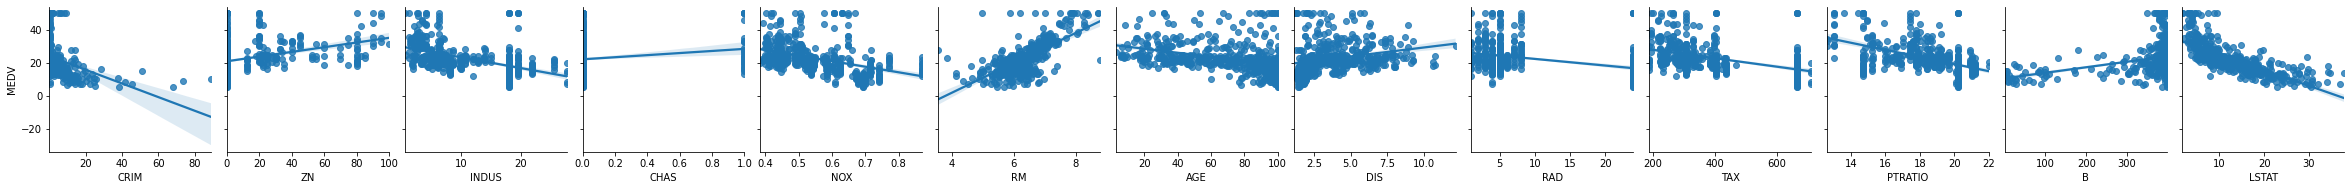

In [ ]:
#import seaborn as sns

sns.pairplot(bostData,x_vars=boston.feature_names,y_vars="MEDV",kind="reg")
plt.show()

**Seems the above pairplot is not that much effective for analysis, so will give a try usiung heatmap, but already from the profiling report we can have a look of correlation**

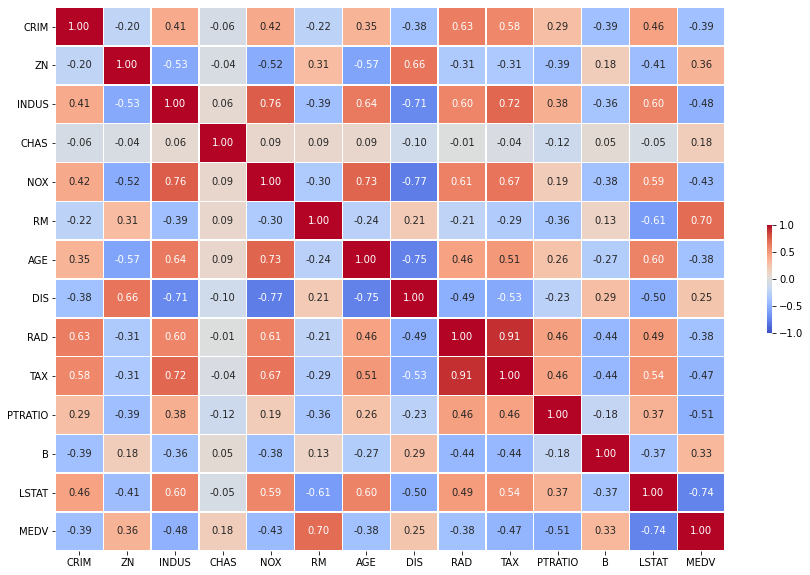

In [ ]:
bostCorr = bostData.corr()
#print(bostCorr)
plt.figure(figsize=(15,10))
sns.heatmap(bostCorr,linewidths = .4,cmap = 'coolwarm',fmt=".2f",cbar_kws = {'shrink': .2},vmin = -1, vmax = 1, annot = True)
plt.show()

From the above heatmap and from profiling report , we can see that there is high correlation between **RAD** & **TAX** columns, so need to take appropriate action.

From the above HeatMap, we can observe that there is high correlation(+ve and -ve) for LSTAT and RM with target MEDV

Will get the coefficients for each feature and can check the values.

In [11]:
#Feature selection using Wrapper method

x_FCheck = bostData.drop("MEDV",axis=1)
y_FCheck = bostData[["MEDV"]]

import statsmodels.api as sm

XConst = sm.add_constant(x_FCheck)
model = sm.OLS(y_FCheck,XConst).fit()
print(model.pvalues)

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64


Will exclude the AGE having high P-value & RAD as having high correlation with TAX with high P-value compared with TAX.

In [15]:
x = bostData[["CRIM","ZN","CHAS","NOX","RM","DIS","PTRATIO","B","LSTAT"]]
y = bostData[["MEDV"]]

In [16]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [17]:
# define the model

model = LinearRegression()

In [18]:
# fit the model
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(model.coef_)

[[-7.77263549e-02  3.49039420e-02  3.64054713e+00 -1.37887535e+01
   4.04565704e+00 -1.32314102e+00 -7.91212070e-01  1.05094409e-02
  -5.54298303e-01]]


In [20]:
y_predict = model.predict(x_test)

In [24]:
print(model.score(x_test,y_test))

0.711261678634537


In [26]:
# Accuracy metrix

#R2 & MSE

from sklearn.metrics import mean_squared_error,r2_score
print("R2 value:" , r2_score(y_test,y_predict))
print("MSE vlaue:" , mean_squared_error(y_test,y_predict))

R2 value: 0.7112616786345369
MSE vlaue: 21.851285470911037
